In [9]:
# using Pkg
# Pkg.activate(".")
# Pkg.instantiate()

  Activating project at `~/git/spatio_temporal_data-rainforest_development`


In [6]:
# CHATGPT APPROACH

using GeoMakie

# Create a Figure object
fig = Figure()

# Define the bounding box coordinates for South America
south_america_bbox = (-90, -30, -60, 15)  # (min_lon, min_lat, max_lon, max_lat)

# Create a GeoAxis object with the desired bounding box
geoaxis = GeoAxis(fig, south_america_bbox)

# Add your geospatial plots or layers to the axis
# For example:
points = [(-70, -15), (-65, -10), (-75, 0)]  # Some example points in South America
scatter!(geoaxis, points)

# Show the figure
display(fig)

MethodError: MethodError: no method matching initialize_block!(::Axis, ::NTuple{4, Int64})

Closest candidates are:
  initialize_block!(::Axis; palette)
   @ Makie ~/.julia/packages/Makie/iECbF/src/makielayout/blocks/axis.jl:160


In [4]:
using GeoMakie, GLMakie

lons = -180:180
lats = -90:90
field = [exp(cosd(l)) + 3(y/90) for l in lons, y in lats]

# Plot coastlines
coastplot = lines!(ax, GeoMakie.coastlines(); color = :black, overdraw = true, coastkwargs...)
translate!(coastplot, 0, 0, 99) # ensure they are on top of other plotted elements

# Surface example
fig = Figure()

ax = GeoAxis(fig[1,1])
surface!(ax, lons, lats, field)
display(fig)

# Scatter example
slons = rand(lons, 2000)
slats = rand(lats, 2000)
sfield = [exp(cosd(l)) + 3(y/90) for (l,y) in zip(slons, slats)]

fig = Figure()
ax = GeoAxis(fig[1,1])
el = scatter!(slons, slats; color = sfield)
display(fig)

UndefVarError: UndefVarError: `coastkwargs` not defined

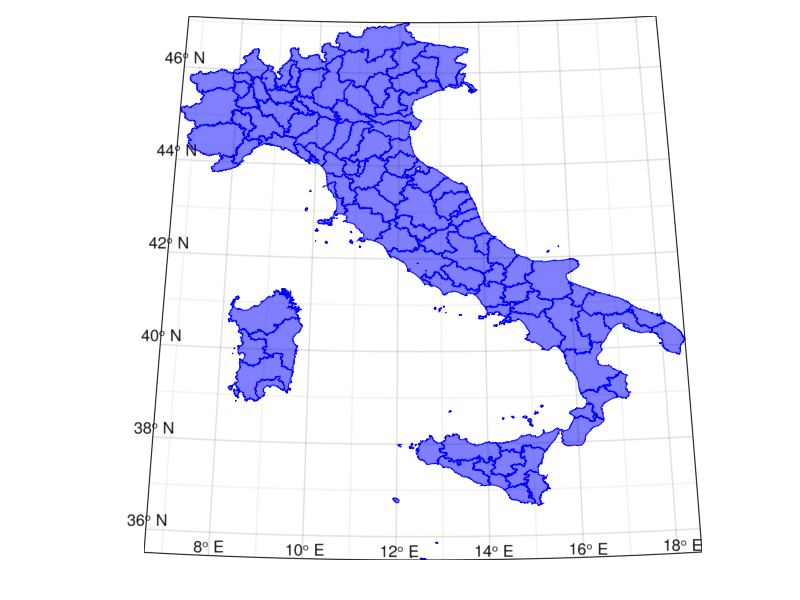

In [20]:

# WORKING EXAMPLE 
using CairoMakie, GeoMakie
using GeoMakie.GeoJSON
using Downloads
using GeometryBasics
using GeoInterface

# Acquire data
it_states = Downloads.download("https://github.com/openpolis/geojson-italy/raw/master/geojson/limits_IT_provinces.geojson")
geo = GeoJSON.read(read(it_states, String))

fig = Figure()
ga = GeoAxis(fig[1, 1]; dest = "+proj=ortho +lon_0=12.5 +lat_0=42", lonlims=(12, 13), latlims = (40, 44))
poly!(ga, geo; strokecolor = :blue, strokewidth = 1, color = (:blue, 0.5), shading = false);
datalims!(ga)

fig

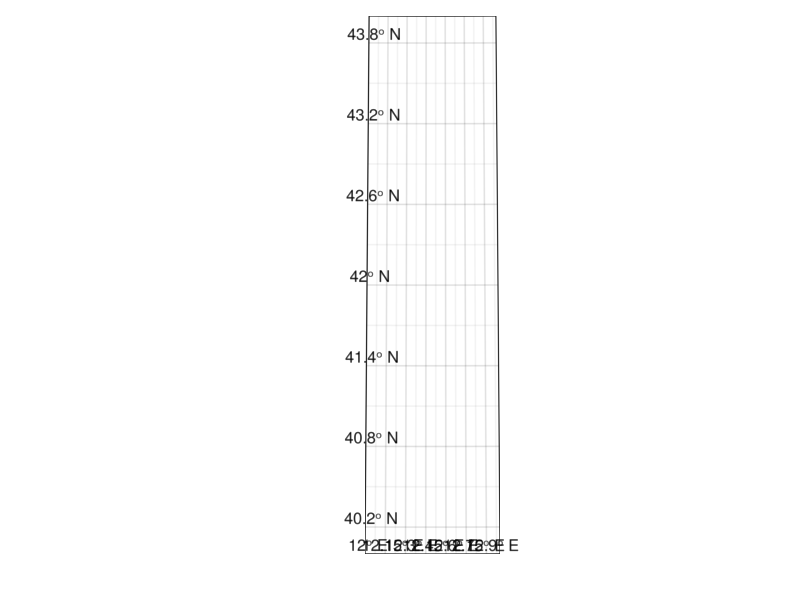

In [24]:
# WORKING EXAMPLE 
using CairoMakie, GeoMakie
using GeoMakie.GeoJSON
using Downloads
using GeometryBasics
using GeoInterface

# Acquire data
# it_states = Downloads.download("https://github.com/openpolis/geojson-italy/raw/master/geojson/limits_IT_provinces.geojson")
# geo = GeoJSON.read(read(it_states, String))

fig = Figure()
ga = GeoAxis(fig[1, 1]; dest = "+proj=ortho +lon_0=12.5 +lat_0=42", lonlims=(12, 13), latlims = (40, 44))
# poly!(ga; strokecolor = :blue, strokewidth = 1, color = (:blue, 0.5), shading = false);
# datalims!(ga)

fig